In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from iotsim.assembler import from_config

In [13]:
a = from_config('assembly.yml')

In [14]:
runner = a.launch()

In [15]:
N=100
data = [snapshot for _, snapshot in zip(range(N), runner)]

In [16]:
charts = []
for signal in a.signals:
    signame = signal.name
    chart_data = dict(name=signame, character=signal.character)

    truth_xs = []
    truth_ys = []
    readings_scatter_xs = []
    readings_scatter_ys = []
    arrivals_scatter_xs = []
    arrivals_scatter_ys = []
    arrivals_line_xs = []
    arrivals_line_ys = []
    
    previous_truth = None
    previous_reading = None
    for tick, snapshot in enumerate(data):
        t = tick * a.tick
        
        truth = snapshot.signal(signame).truth.value
        if signal.character == 'discrete':
            if previous_truth is not None and previous_truth != truth:
                truth_xs.append(t)
                truth_ys.append(previous_truth)
            previous_truth = truth
        truth_xs.append(t)
        truth_ys.append(truth)

        reading = snapshot.signal(signame).reading.value
        if not reading is None:
            readings_scatter_xs.append(t)
            readings_scatter_ys.append(reading)
            if snapshot.signal(signame).reading.arrived:
                arrival_time = t + snapshot.signal(signame).reading.arrival_delay
                if signal.character == 'discrete':
                    if previous_reading is not None and previous_reading != reading:
                        arrivals_line_xs.append(arrival_time)
                        arrivals_line_ys.append(previous_reading)
                    previous_reading = reading
                arrivals_line_xs.append(arrival_time)
                arrivals_line_ys.append(reading)
                arrivals_scatter_xs.append(arrival_time)
                arrivals_scatter_ys.append(reading)
    
    chart_data['truth'] = (truth_xs, truth_ys)
    chart_data['readings_scatter'] = (readings_scatter_xs, readings_scatter_ys)
    chart_data['arrivals_scatter'] = (arrivals_scatter_xs, arrivals_scatter_ys)
    chart_data['arrivals_line'] = (arrivals_line_xs, arrivals_line_ys)
    charts.append(chart_data)

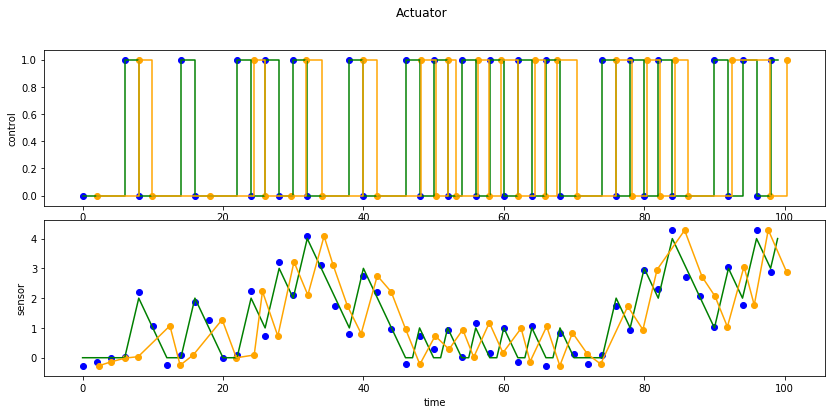

In [17]:
def plot_signal(axis, chart_data):
  
    axis.plot(chart_data['truth'][0], chart_data['truth'][1], color='g')
    axis.scatter(chart_data['readings_scatter'][0], chart_data['readings_scatter'][1], color='b')
    axis.plot(chart_data['arrivals_line'][0], chart_data['arrivals_line'][1], color='orange')
    axis.scatter(chart_data['arrivals_scatter'][0], chart_data['arrivals_scatter'][1], color='orange')
    axis.set_ylabel(chart_data['name'])
    
fig = figure(num=1, figsize=(14, 3*len(charts)))
fig.suptitle(a.name)
gs = GridSpec(4, 1, figure=fig)
ax0 = fig.add_subplot(gs[0:2, 0])
plot_signal(ax0, charts[0])
for i in range(len(charts)-1):
    axi = fig.add_subplot(gs[2+i:4+i, 0], sharex=ax0)
    plot_signal(axi, charts[i+1])

xlabel('time')
plt.show()